In [1]:
def evaluate_classifier(df_positive, df_negative, pos_label=1, neg_label=0, title_suffix="", save_path=None):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
    import os

    roc_data = []
    # Labels setzen
    df_positive = df_positive.copy()
    df_negative = df_negative.copy()
    df_positive['Label'] = pos_label
    df_negative['Label'] = neg_label

    # Kombinieren
    data = pd.concat([df_positive, df_negative], ignore_index=True)

    y_numeric = pd.concat([
        pd.Series([pos_label] * len(df_positive)),
        pd.Series([neg_label] * len(df_negative))
    ], ignore_index=True)

    # Labels umbenennen für Legende
    label_map = {pos_label: "Positive", neg_label: "Negative"}
    data['Label'] = data['Label'].map(label_map)

    # Visualisierung: Histogramm
    plt.figure(figsize=(12, 8))
    sns.histplot(data=data, x='z-score calculated from 7 8 and 9', hue='Label', kde=True, bins=50)
    # plt.title(f"SISSIz: Histogram {title_suffix}")
    plt.xlabel("z-Score")
    plt.ylabel("Number")
    if save_path:
        filename = os.path.join(save_path, f"SISSIz: Histogram {title_suffix}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.legend(label_map.values())
    plt.show()

    # Vorbereitung
    X = data[['z-score calculated from 7 8 and 9']]
    y = y_numeric
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Cross-Validation
    y_pred = cross_val_predict(model, X, y, cv=5, method='predict')
    y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    labels = ["Negative", "Positive"]

    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    # plt.title(f"SISSIz: Confusion Matrix {title_suffix}")
    if save_path:
        filename = os.path.join(save_path, f"SISSIz: Confusion Matrix {title_suffix}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

    print("\n Classification Report:\n", classification_report(y, y_pred))

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 8))
    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.2f})", color='red')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # plt.title(f"SISSIz: ROC-Curve {title_suffix}")
    plt.legend(loc="lower right")
    plt.grid(True)
    if save_path:
        filename = os.path.join(save_path, f"SISSIz: ROC-Curve {title_suffix}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

    roc_data.append({
        'label': title_suffix,
        'y_true': y,
        'y_proba': y_proba,
    })

    return roc_data


In [2]:
import pandas as pd

# Load the data
df_sissi = pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/SISSIz_Excel/sissi.xlsx", usecols=['z-score calculated from 7 8 and 9'])
df_sissiz_mono = pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/SISSIz_Excel/sissiz_mono.xlsx", usecols=['z-score calculated from 7 8 and 9'])
df_sissiz_di = pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/SISSIz_Excel/sissiz_di.xlsx", usecols=['z-score calculated from 7 8 and 9'])
df_multiperm_mono = pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/SISSIz_Excel/multiperm_mono.xlsx", usecols=['z-score calculated from 7 8 and 9'])
df_multiperm_di = pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/SISSIz_Excel/multiperm_di.xlsx", usecols=['z-score calculated from 7 8 and 9'])
df_aln_shuffle = pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/SISSIz_Excel/alifoldz.xlsx", usecols=['z-score calculated from 7 8 and 9'])

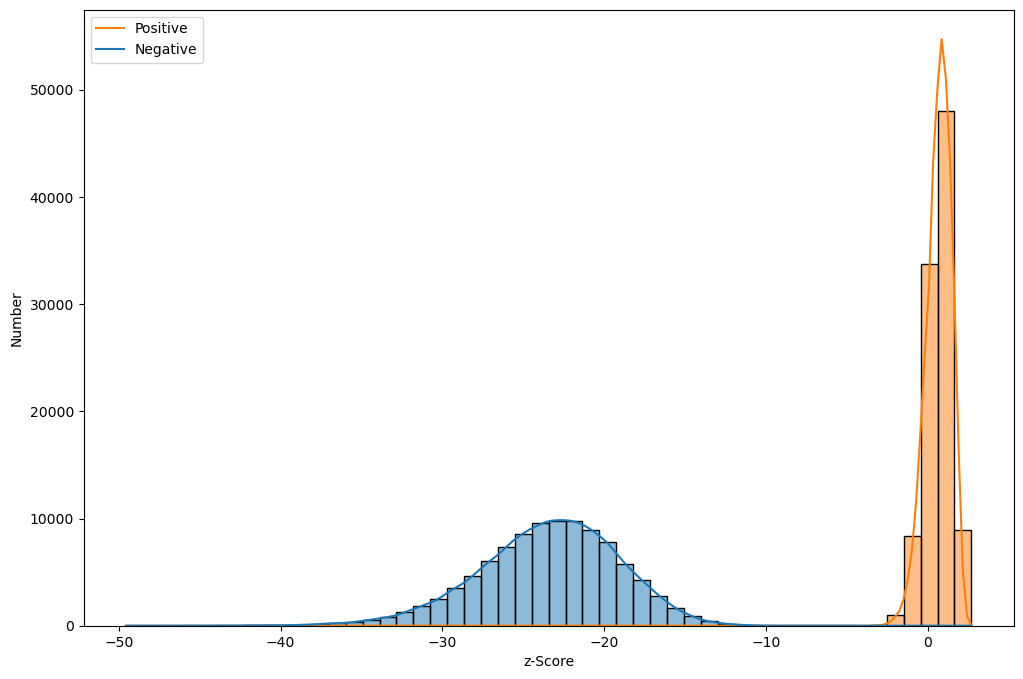

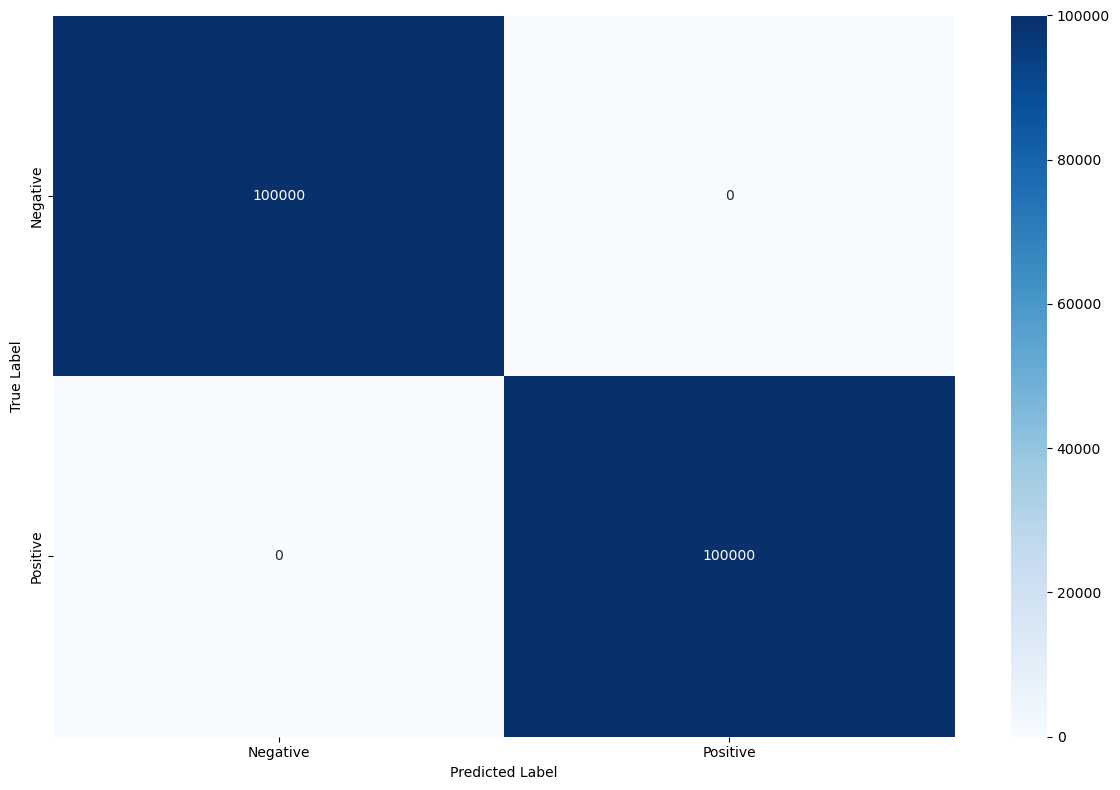


 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    100000
           1       1.00      1.00      1.00    100000

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



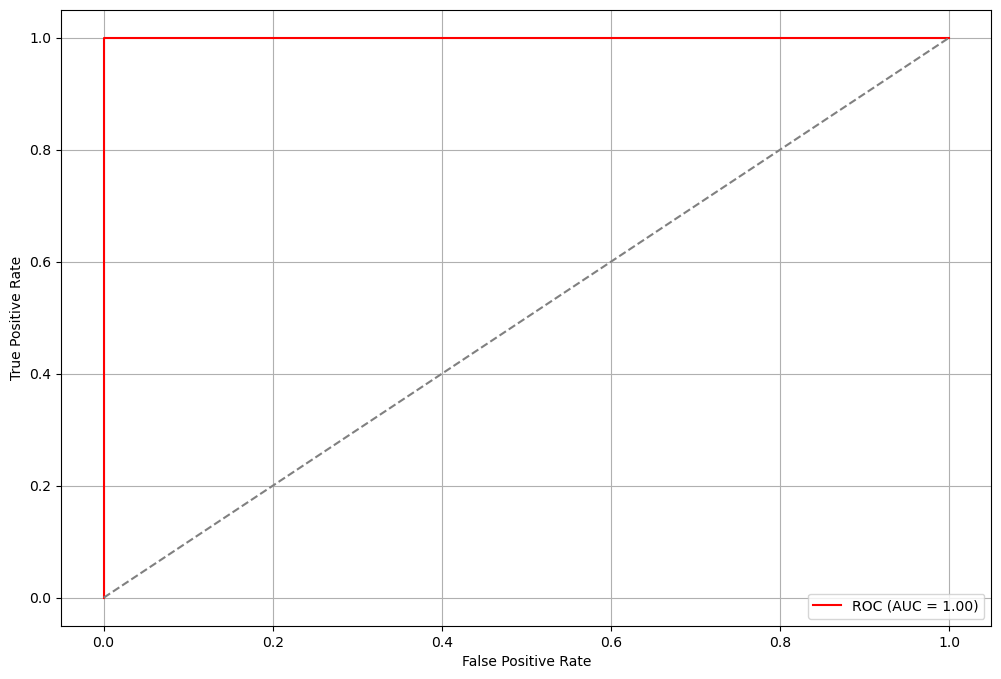

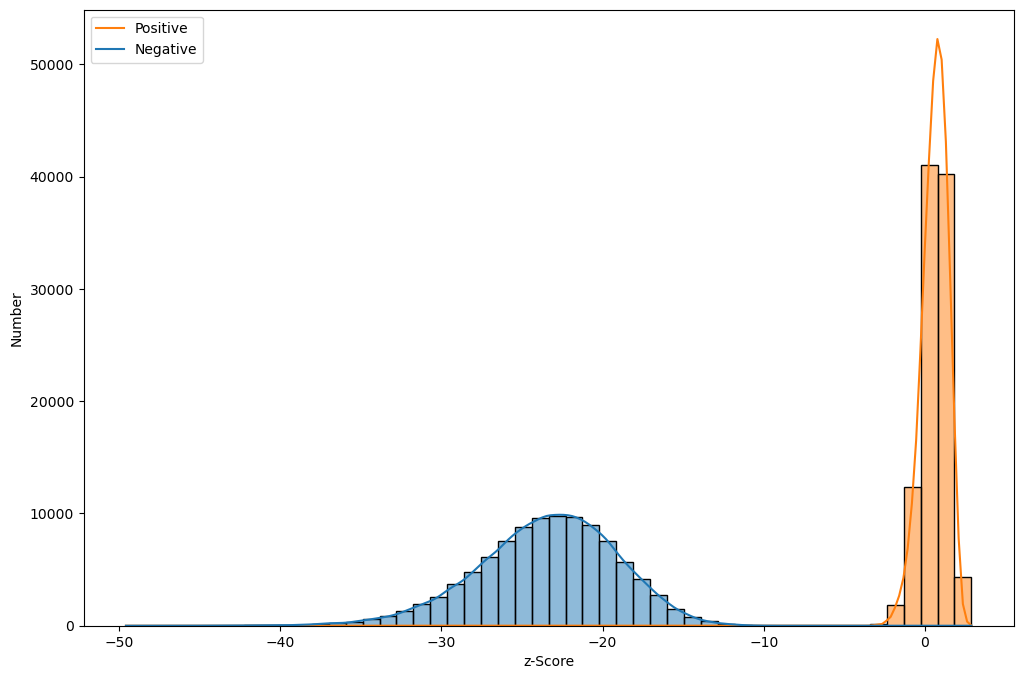

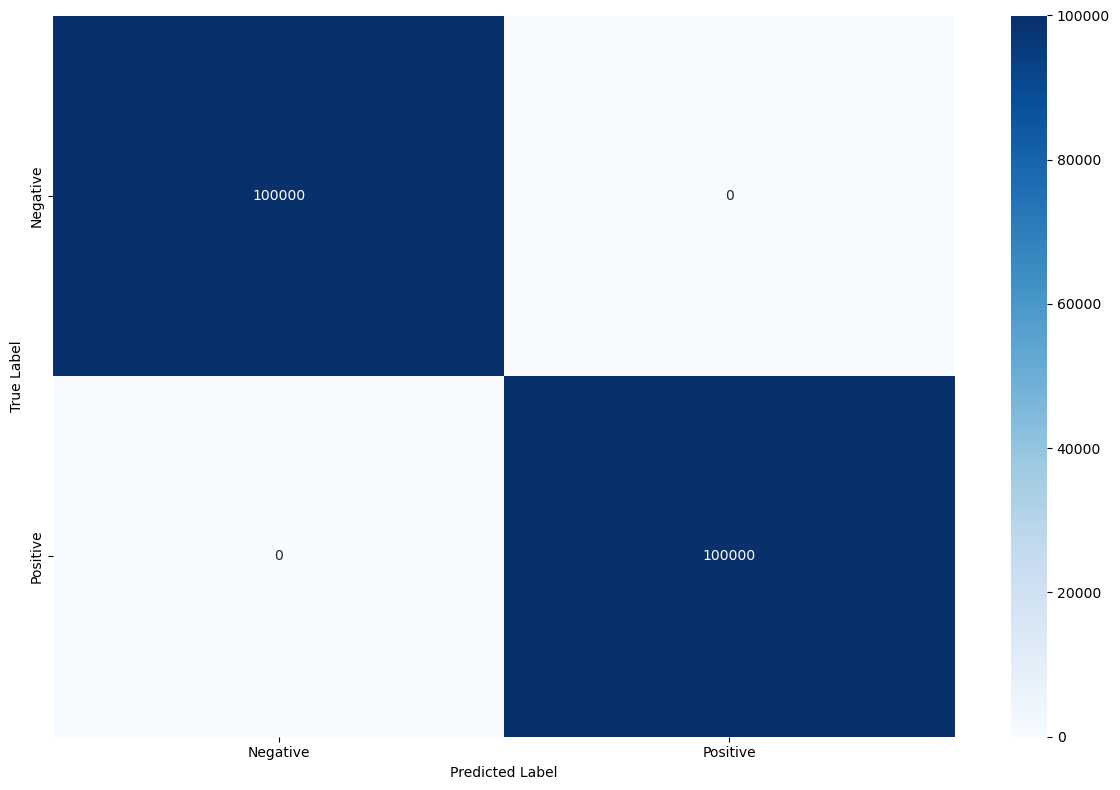


 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    100000
           1       1.00      1.00      1.00    100000

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



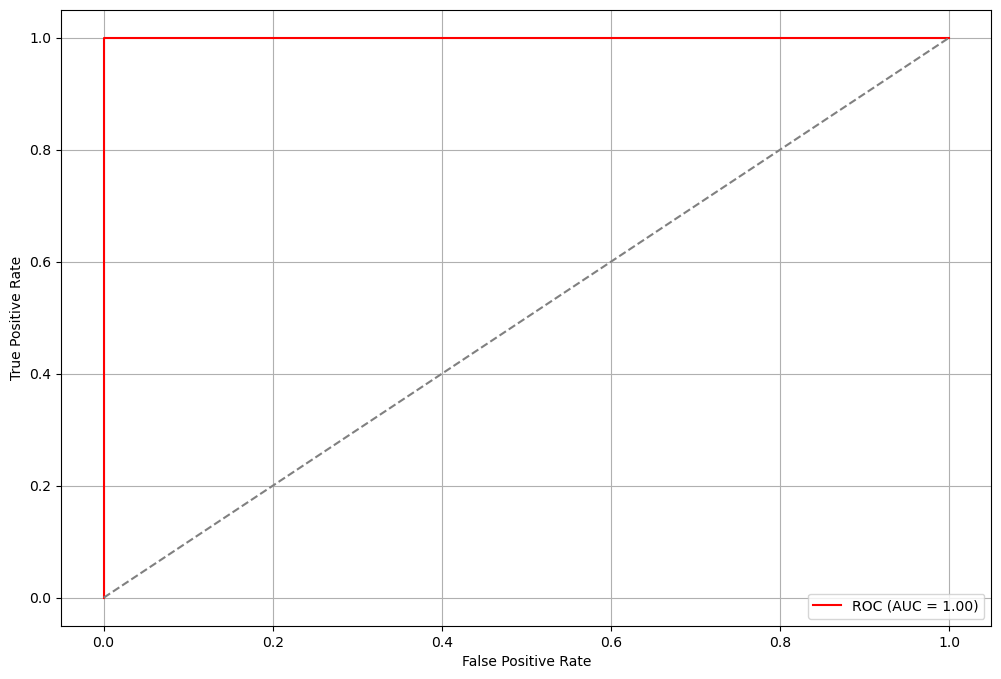

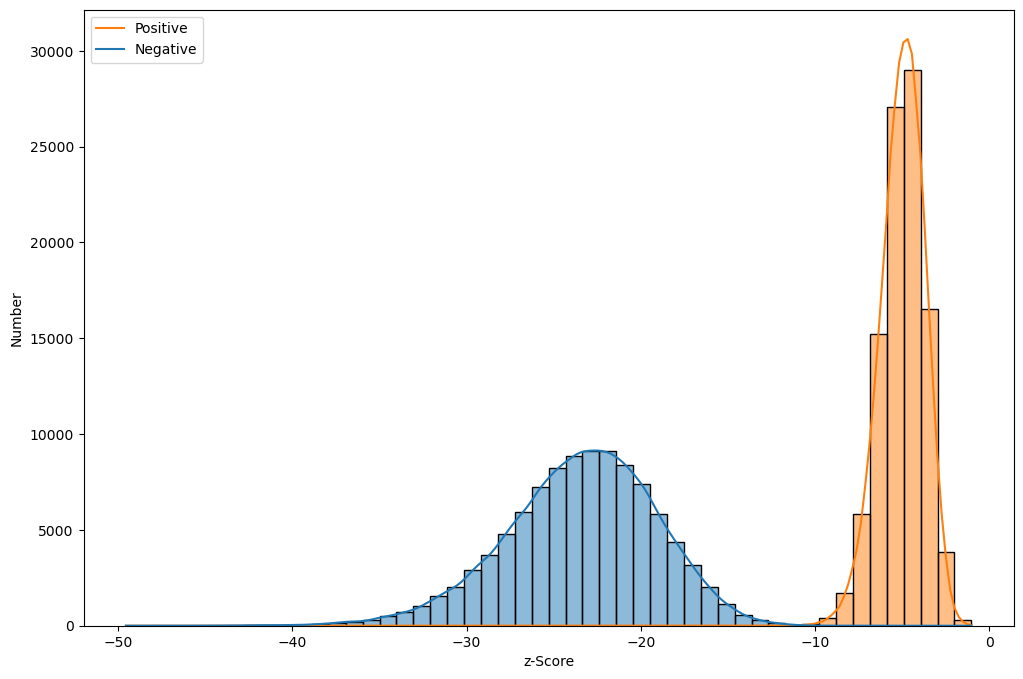

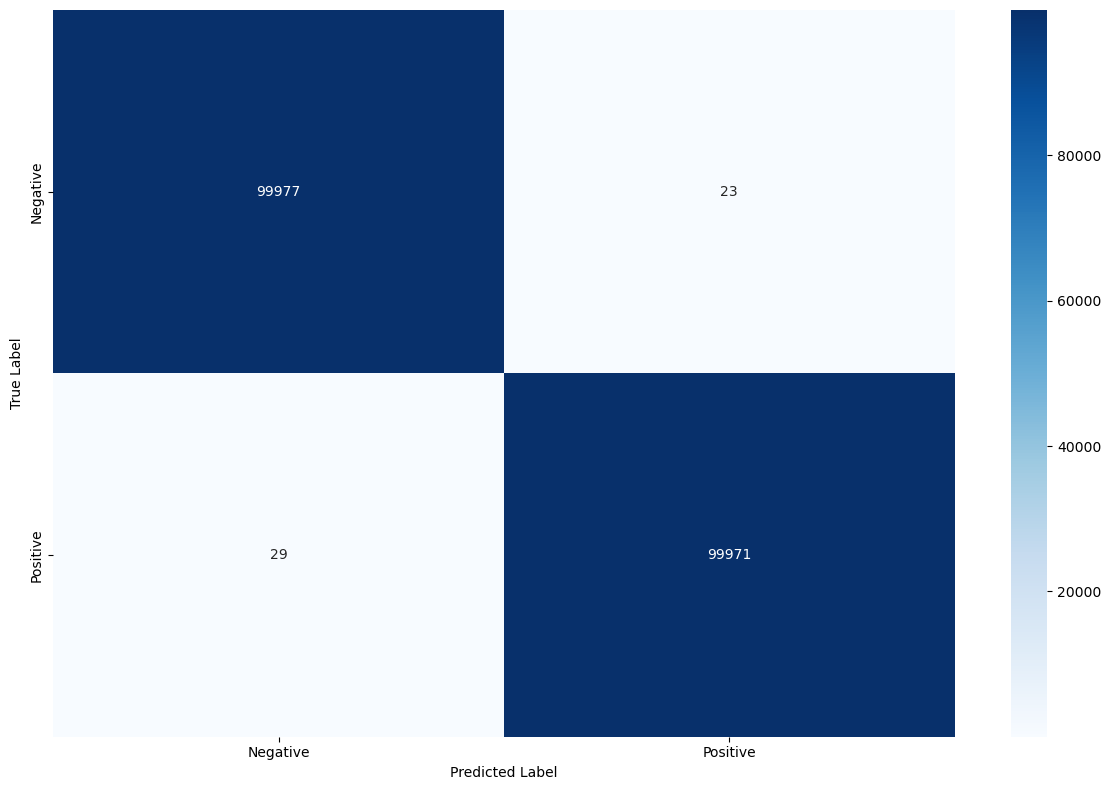


 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    100000
           1       1.00      1.00      1.00    100000

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



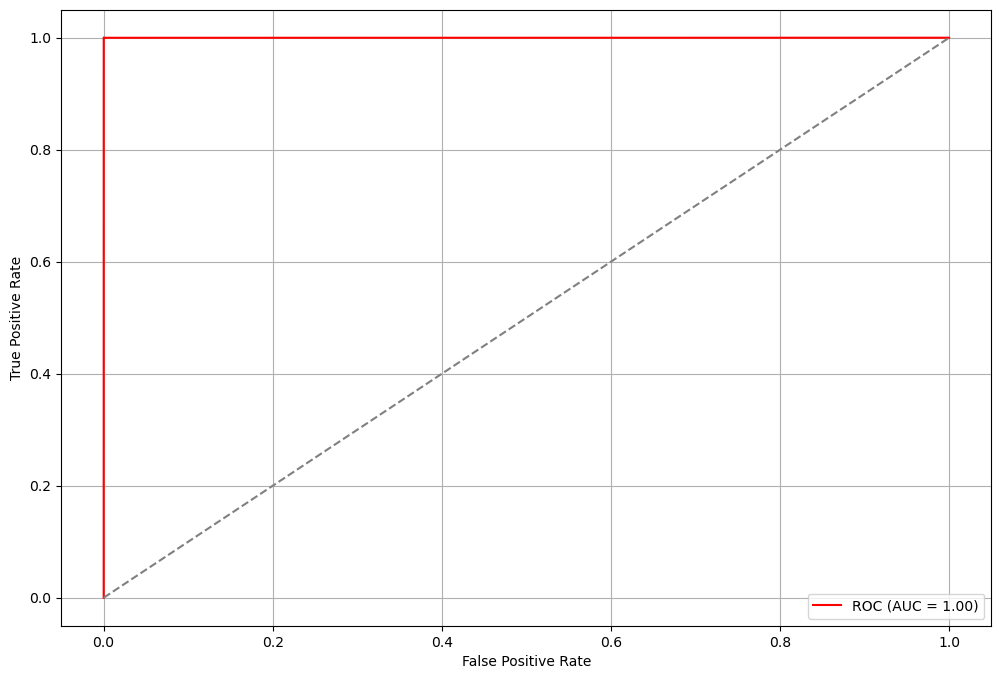

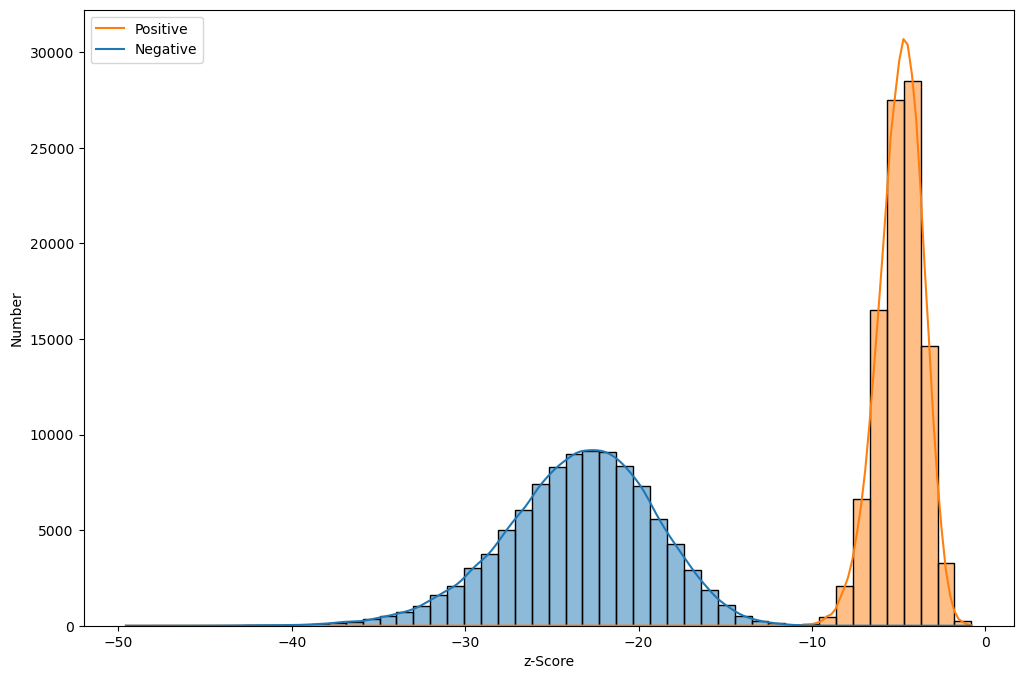

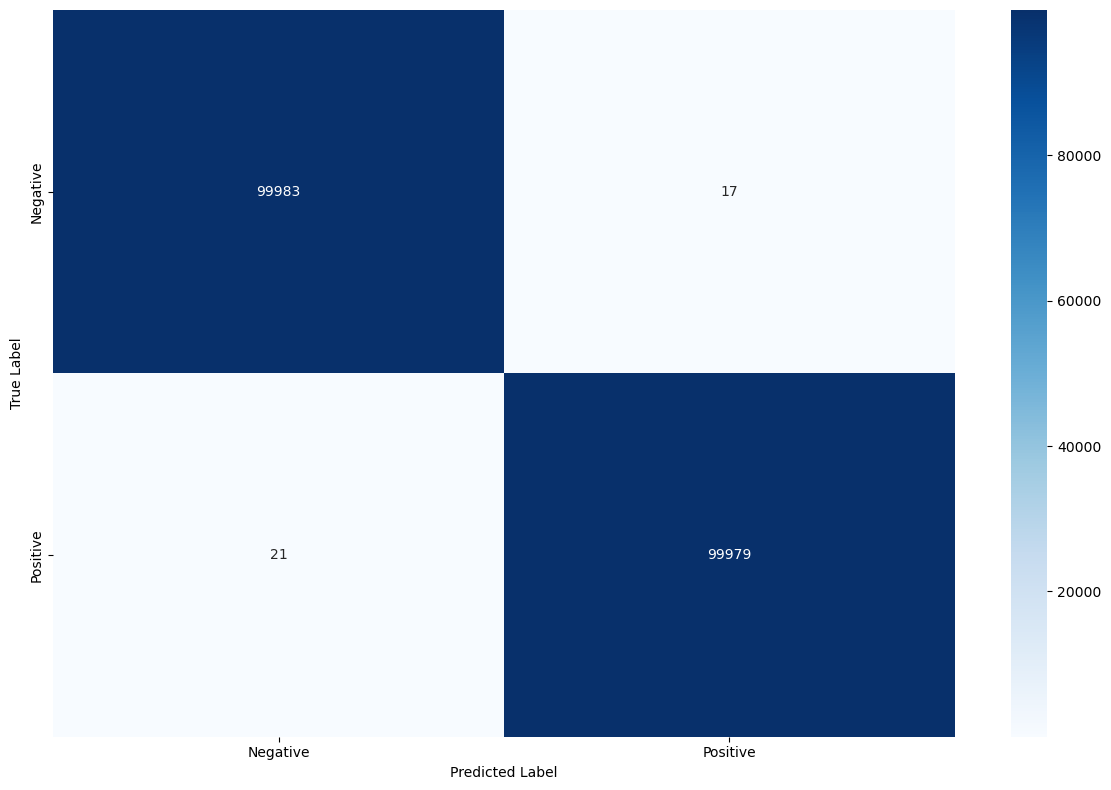


 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    100000
           1       1.00      1.00      1.00    100000

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



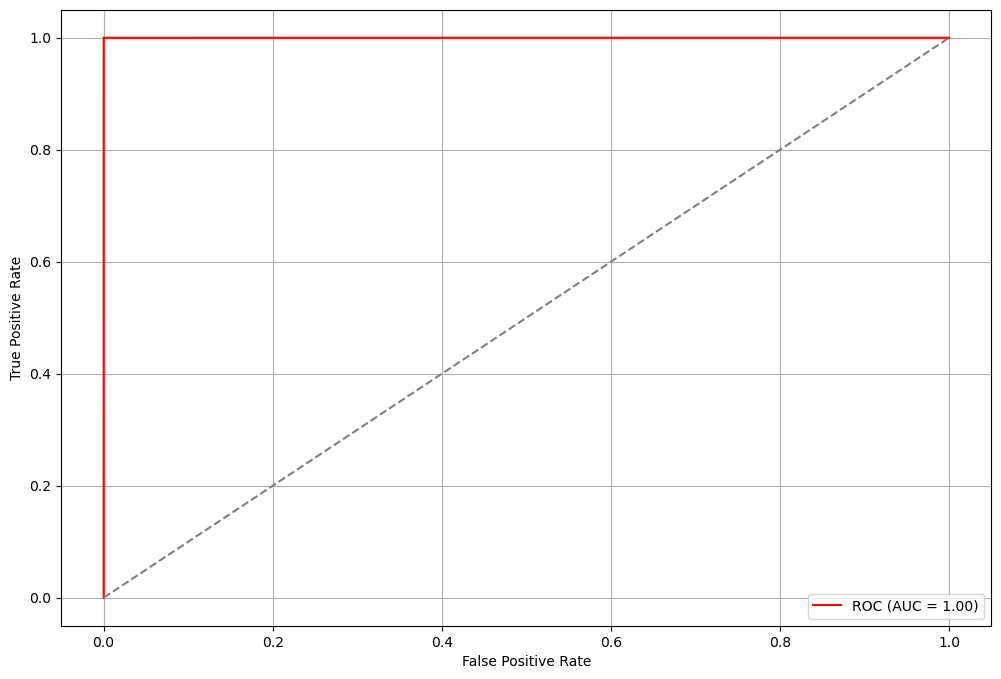

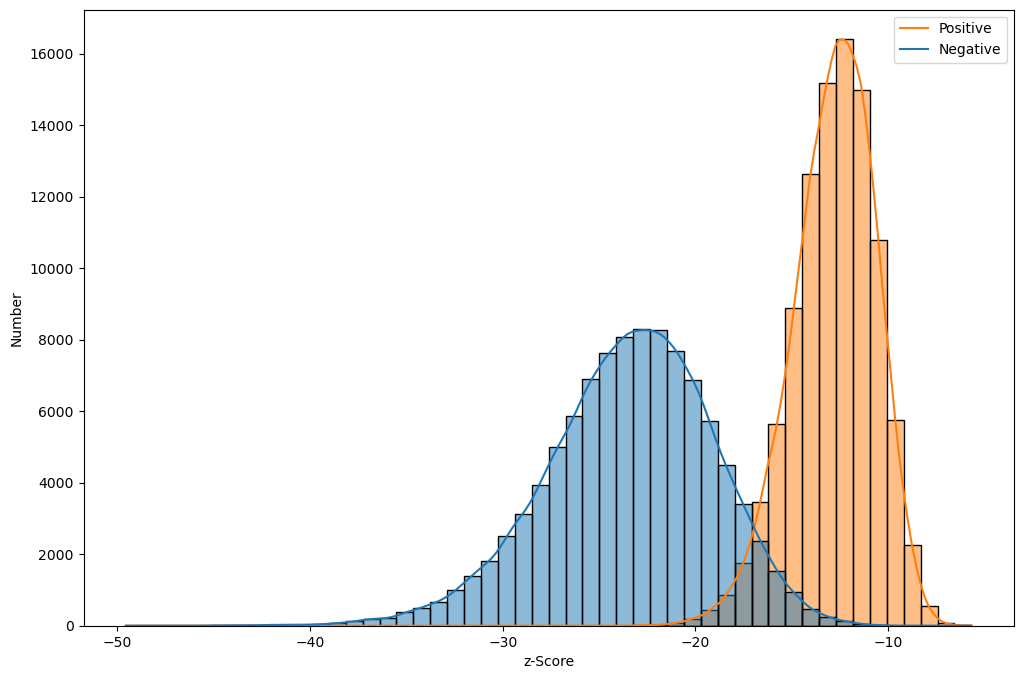

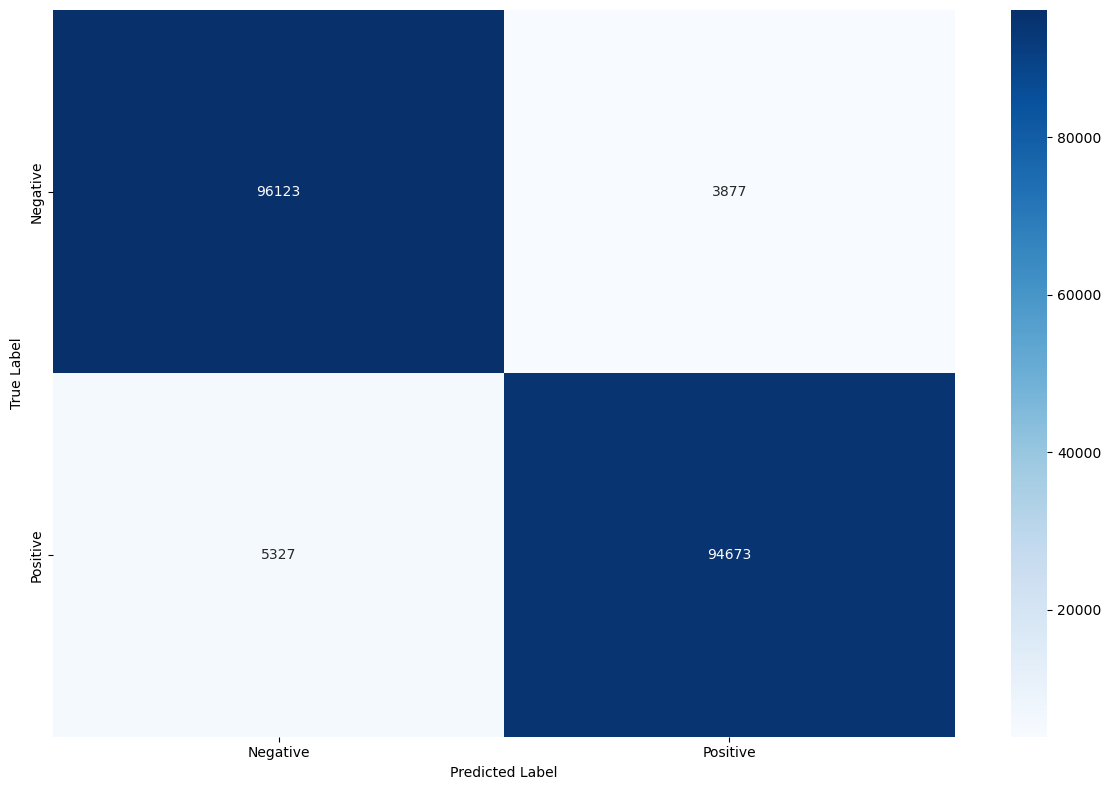


 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95    100000
           1       0.96      0.95      0.95    100000

    accuracy                           0.95    200000
   macro avg       0.95      0.95      0.95    200000
weighted avg       0.95      0.95      0.95    200000



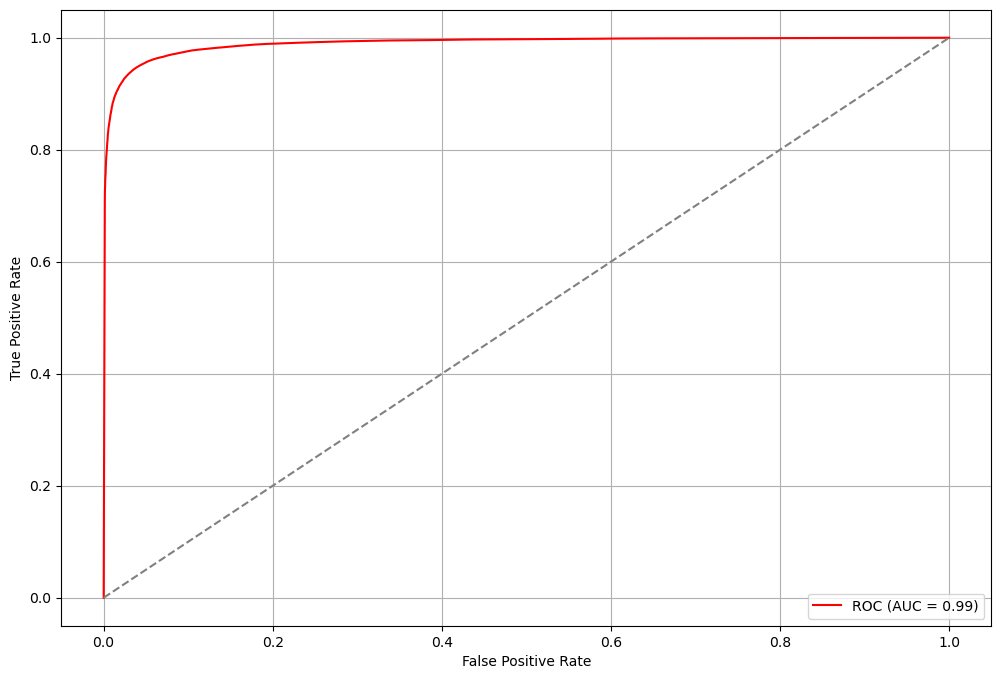

In [3]:
all_roc_data = []

tools = [
    {
        "df_positive": df_sissi,
        "df_negative": df_sissiz_mono,
        "title_suffix": "SISSI vs SISSIz_MONO with randomized samples",
        "save_path": "/mnt/bernhard/Masterarbeit/2.Versuch/Plots/Randomized/SISSIz/"
    }, 
    {
        "df_positive": df_sissi,
        "df_negative": df_sissiz_di,
        "title_suffix": "SISSI vs SISSIz_DI with randomized samples",
        "save_path": "/mnt/bernhard/Masterarbeit/2.Versuch/Plots/Randomized/SISSIz/"
    }, 
    {
        "df_positive": df_sissi,
        "df_negative": df_multiperm_mono,
        "title_suffix": "SISSI vs Multiperm_MONO with randomized samples",
        "save_path": "/mnt/bernhard/Masterarbeit/2.Versuch/Plots/Randomized/SISSIz/"
    }, 
    {
        "df_positive": df_sissi,
        "df_negative": df_multiperm_di,
        "title_suffix": "SISSI vs Multiperm_DI with randomized samples",
        "save_path": "/mnt/bernhard/Masterarbeit/2.Versuch/Plots/Randomized/SISSIz/"
    }, 
    {
        "df_positive": df_sissi,
        "df_negative": df_aln_shuffle,
        "title_suffix": "SISSI vs Aln_Shuffle with randomized samples",
        "save_path": "/mnt/bernhard/Masterarbeit/2.Versuch/Plots/Randomized/SISSIz/"
    }
]

for tool in tools:
    roc_data = evaluate_classifier(
        df_positive=tool["df_positive"],
        df_negative=tool["df_negative"],
        title_suffix=tool["title_suffix"],
        save_path=tool["save_path"]
    )
    all_roc_data.extend(roc_data)

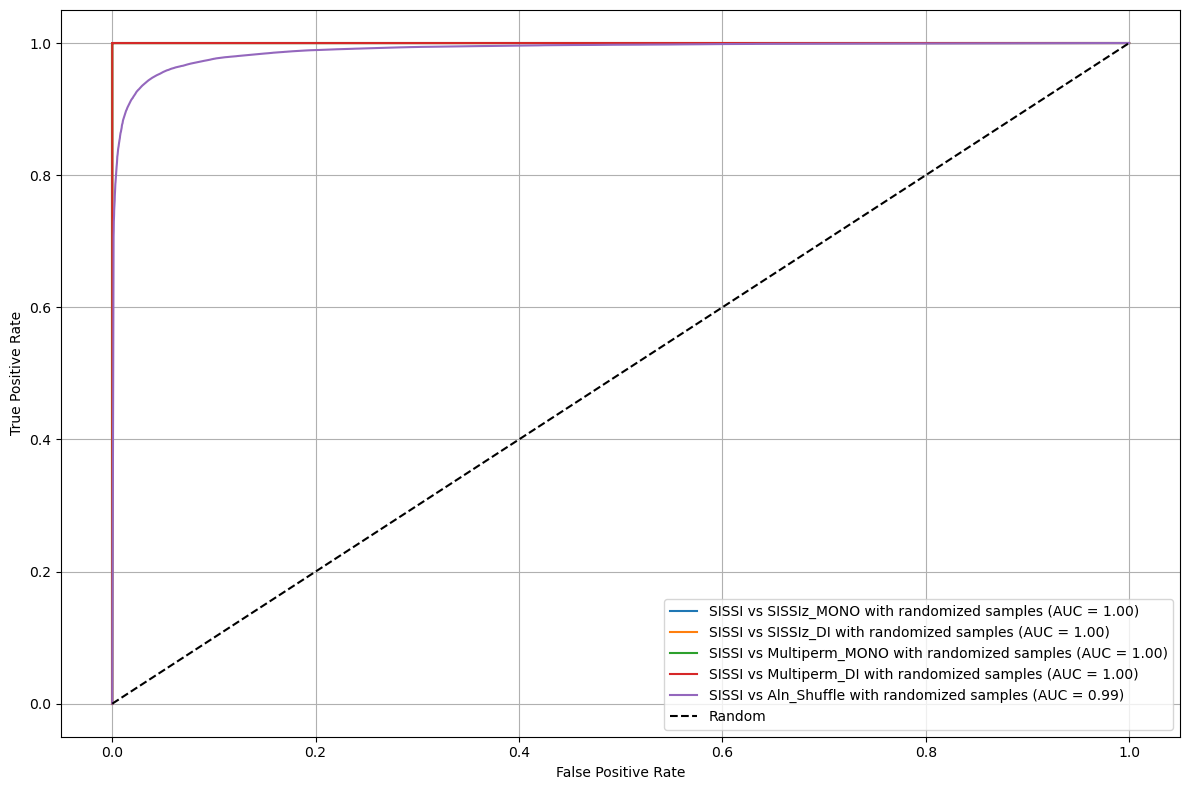

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os

save_path= "/mnt/bernhard/Masterarbeit/2.Versuch/Plots/Randomized/SISSIz/"
plt.figure(figsize=(12, 8))

for entry in all_roc_data:
    fpr, tpr, _ = roc_curve(entry['y_true'], entry['y_proba'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{entry['label']} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.title("SISSIz: ROC-Curves Comparison with randomized samples")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
if save_path:
        filename = os.path.join(save_path, f"SISSIz: ROC-Curve All with randomized samples.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()